# Bayes Classifier with GMM<hr>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot = False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
class BayesClassifier:
    def fit(self, X, Y):
        # assume classes are numbered 0...K-1
        self.K = len(set(Y))
        self.gaussians = []
        for k in range(self.K):
            print('Fitting gmm', k)
            Xk = X[Y ==k]
            gmm = BayesianGaussianMixture(10)
            gmm.fit(Xk)
            self.gaussians.append(gmm)
            
    def sample_given_y(self, y):
        gmm = self.gaussians[y]
        sample = gmm.sample()
        # note: sample returns a tuple containing 2 things:
        # 1) the sample
        # 2) which cluster it came from
        # we'll use (2) to obtain the means so we can plot
        # them like we did in the previous script
        # we cheat by looking at "non-public" params in
        # the sklearn source code
        mean = gmm.means_[sample[1]]
        return sample[0].reshape(28, 28), mean.reshape(28, 28)
    
    def sample(self):
        y = np.random.randint(self.K)
        return self.sample_given_y(y)

Fitting gmm 0
Fitting gmm 1
Fitting gmm 2
Fitting gmm 3
Fitting gmm 4
Fitting gmm 5
Fitting gmm 6
Fitting gmm 7
Fitting gmm 8
Fitting gmm 9


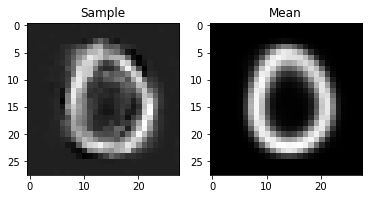

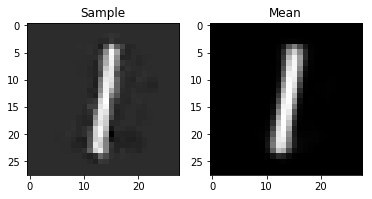

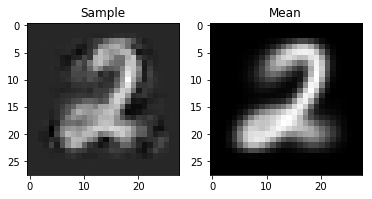

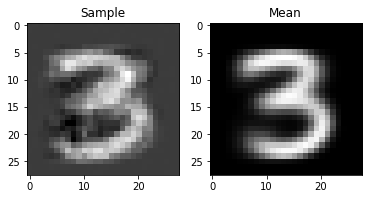

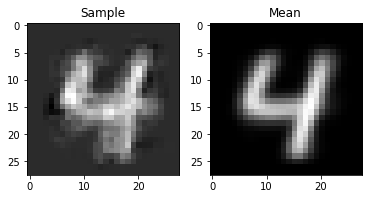

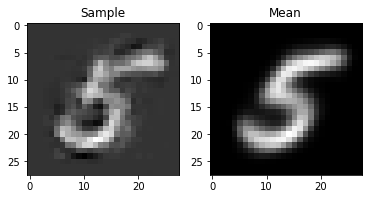

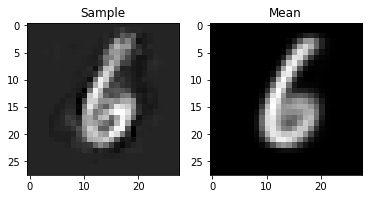

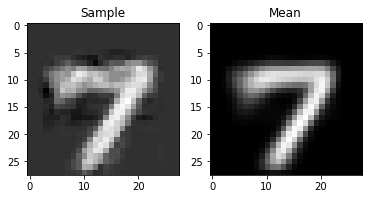

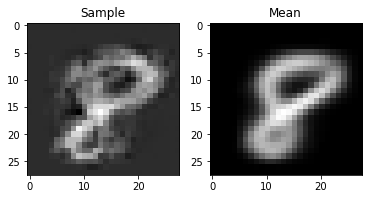

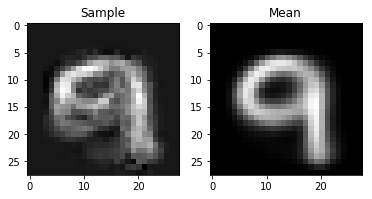

In [18]:
X = mnist.train.images
Y = mnist.train.labels

clf = BayesClassifier()
clf.fit(X,Y)

for k in range(clf.K):
    sample, mean = clf.sample_given_y(k)
    
    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title('Sample')
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title('Mean')
    plt.show()

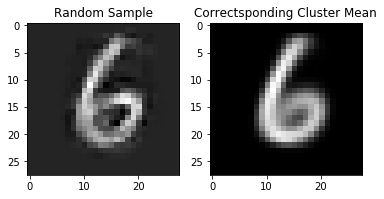

In [19]:
sample, mean = clf.sample()
plt.subplot(1,2,1)
plt.imshow(sample, cmap='gray')
plt.title('Random Sample')
plt.subplot(1,2,2)
plt.imshow(mean, cmap='gray')
plt.title('Correctsponding Cluster Mean')
plt.show()